In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Mounted at /content/drive


In [2]:
# modelo
m = 1
# tamanho da janela deslizante
n = 3
veremiPath = "/content/drive/MyDrive/dataset/veremi"
t2Path = "/veremiWithT2"
simcsvPath = '/simulationscsv'
window = "/window"+str(n)+"v2"
model = "/model"+str(m)
knnPath = '/knn'

os.chdir(veremiPath+t2Path+window+model+'/allscenarios2')
multi = pd.read_csv('allsc2.csv', index_col=0)
os.chdir(veremiPath+t2Path+window+model+'/allscenarios1')
binary = pd.read_csv('allsc1.csv', index_col=0)

# os.chdir(veremiPath+t2Path+window+knnPath+model)
# os.listdir()

In [ ]:
# All scenarios 1
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
data = binary.iloc[:, 0:-1].values
classes = binary.iloc[:, -1].values
lb = preprocessing.LabelBinarizer()
lb.fit(classes)
data_train, data_test, classes_train, classes_test = train_test_split(data, classes, test_size=0.2, random_state=1)
print('data_train', data_train.shape)
print('data_test', data_test.shape)
print('classes_train', classes_train.shape)
print('classes_test', classes_test.shape)

data_train (14817733, 6)
data_test (3704434, 6)
classes_train (14817733,)
classes_test (3704434,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
start_time = time.time()
clf.fit(data_train, classes_train)
print('Training done in ', "{:.2f}".format(time.time() - start_time)+' sec', sep='')
proba = clf.predict_proba(data_test)

Training done in 149.97 sec


Best Threshold=0.400000, F-Score=0.833
----------------------------------------------------------------------
Classification Report for md1knnbinary
              precision    recall  f1-score   support

     class 0      0.963     0.953     0.958   2977507
     class 1      0.815     0.852     0.833    726927

    accuracy                          0.933   3704434
   macro avg      0.889     0.902     0.896   3704434
weighted avg      0.934     0.933     0.934   3704434

----------------------------------------------------------------------


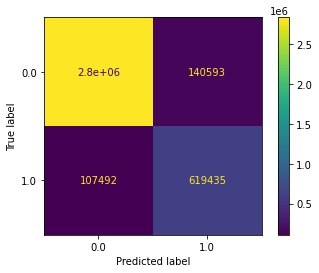

----------------------------------------------------------------------


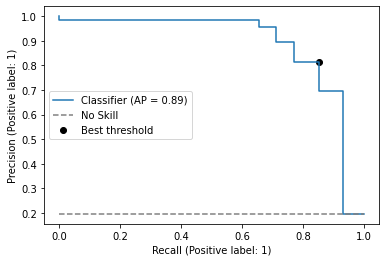

----------------------------------------------------------------------


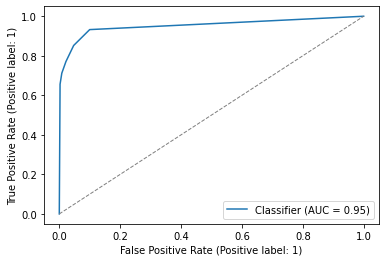

In [ ]:
# All scenarios - model allsc1
# metrics
from sklearn.preprocessing import MultiLabelBinarizer
clTest = classes_test
os.chdir(veremiPath+t2Path+window+knnPath+model+'/allscenarios1')
# Best threshold
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(clTest, proba[:, 1], pos_label=1)
# convert to f score
np.seterr(divide='ignore', invalid='ignore')
fscore = (2 * precision * recall) / (precision + recall)
np.nan_to_num(fscore, copy=False)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
print("-"*70)
# Classification Report
from sklearn.metrics import classification_report
# predictsrelu = modelrelu.predict(data_test)
# clTest = lb.inverse_transform(classes_test)
pred = np.where(np.array(proba[:, 1]) >= thresholds[ix], 1, 0)
print('Classification Report for md'+str(m)+'knn'+'binary')
print(classification_report(clTest, pred, target_names=['class 0', 'class 1'], digits=3))
print("-"*70)
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# predrelu = lb.inverse_transform(predictsrelu, threshold=thresholds[ix])
cm = confusion_matrix(clTest, pred, labels=lb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lb.classes_)
disp.plot()
# plt.title('md'+str(m)+'w'+str(n)+'binary'+'.pdf')
plt.savefig('md'+str(m)+'knn'+'binary'+'.pdf')
plt.show()
print("-"*70)
# Precision-Recall curve
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(clTest, proba[:, 1], pos_label=1)
# plt.title('PR curve '+'md'+str(m)+'w'+str(n)+'binary'+'.pdf')
no_skill = len(clTest[clTest==1]) / len(clTest)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', color="grey", label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best threshold')
plt.legend()
plt.savefig('PRcurve '+'md'+str(m)+'knn'+'binary'+'.pdf')
plt.show()
print("-"*70)
# ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(clTest, proba[:, 1], pos_label=1)
# plt.title('ROC curve '+'md'+str(m)+'w'+str(n)+'binary'+'.pdf')
plt.plot([0, 1], [0, 1], color="grey", lw=1, linestyle="--")
plt.savefig('ROCcurve '+'md'+str(m)+'knn'+'binary'+'.pdf')
plt.show()

In [3]:
# All scenarios 2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
# multi.iloc[:, -1].unique()
# split data and label
data = multi.iloc[:, 0:-1].values
classes = multi.iloc[:, -1].values
# # multilabel binarize
lb = preprocessing.LabelBinarizer()
lb.fit(classes)
# split test and train
data_train, data_test, classes_train, classes_test = train_test_split(data, classes, test_size=0.2, random_state=1)
print('data_train', data_train.shape)
print('data_test', data_test.shape)
print('classes_train', classes_train.shape)
print('classes_test', classes_test.shape)

data_train (14817733, 6)
data_test (3704434, 6)
classes_train (14817733,)
classes_test (3704434,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import joblib
clf = KNeighborsClassifier()
start_time = time.time()
clf.fit(data_train, classes_train)
print('Training done in ', "{:.2f}".format(time.time() - start_time)+' sec', sep='')
os.chdir(veremiPath+t2Path+window+knnPath+model+'/allscenarios1')
joblib.dump(clf, 'knnfit.pkl')

Training done in 64.69 sec


['knnfit.pkl']

Classification Report for md1knnmulti
              precision    recall  f1-score   support

     class 0      0.944     0.980     0.962   2977507
     class 1      0.994     0.999     0.996    144452
     class 2      0.638     0.404     0.494    143395
     class 4      1.000     0.999     1.000    145650
     class 8      0.685     0.432     0.530    145158
    class 16      0.950     0.890     0.919    148272

    accuracy                          0.934   3704434
   macro avg      0.868     0.784     0.817   3704434
weighted avg      0.926     0.934     0.928   3704434

----------------------------------------------------------------------


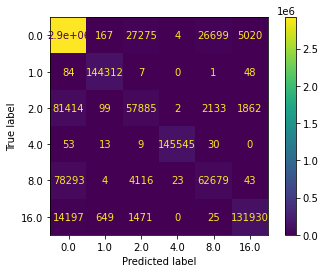

In [5]:
import joblib
# All scenarios - model allsc2
# metrics
os.chdir(veremiPath+t2Path+window+knnPath+model+'/allscenarios1')
clf = joblib.load('knnfit.pkl' , mmap_mode ='r')
proba = clf.predict_proba(data_test)
# Classification Report
from sklearn.metrics import classification_report
clTest = classes_test
pred = lb.inverse_transform(proba)
classlist = []
for cl in lb.classes_:
  classlist.append('class '+str(int(cl)))
print('Classification Report for md'+str(m)+'knn'+'multi')
print(classification_report(clTest,
                            pred,
                            target_names=classlist,
                            digits=3,
                            zero_division=0))
print("-"*70)
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(clTest, pred, labels=lb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lb.classes_)
disp.plot()
# plt.title('md'+str(m)+'w'+str(n)+'multi'+'.pdf')
plt.savefig('md'+str(m)+'knn'+'multi'+'.pdf')
plt.show()

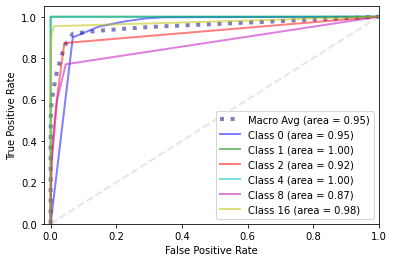

In [15]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
n_classes = data_test.shape[1]
lbclasses_test = lb.transform(classes_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(lbclasses_test[:, i], proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw = 2
plt.figure()
# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
#     color="deeppink",
#     linestyle=":",
#     linewidth=4,
# )

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="Macro Avg (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
    alpha=0.5,
)

colors = cycle(["b", "g", "r", "c", "m", "y"])
for i, color in zip(range(n_classes), colors):
    if i == 0:
      label = 0
    elif i == 1:
      label = 1
    elif i == 2:
      label = 2
    elif i == 3:
      label = 4
    elif i == 4:
      label = 8
    elif i == 5:
      label = 16

    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="Class {0} (area = {1:0.2f})".format(label, roc_auc[i]),
        alpha=0.5
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw, color="grey", alpha=0.2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.savefig('ROCcurve '+'md'+str(m)+'knn'+'multi'+'.pdf')
plt.show()